<a href="https://colab.research.google.com/github/Keoni808/Visuals/blob/main/Linear_Transformations_(Figures).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Understanding Linear Transformations: A Guide for Self-Learners, By a Self-Learner"


In [ ]:
# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [ ]:
# Define the original vectors and transformation matrix
original_vectors = np.array([[1, 0], [0, 1]])
transformation_matrix = np.array([[2, 1], [1, 2]])  # A matrix that scales and rotates

In [ ]:
# Apply the transformation
transformed_vectors = original_vectors @ transformation_matrix

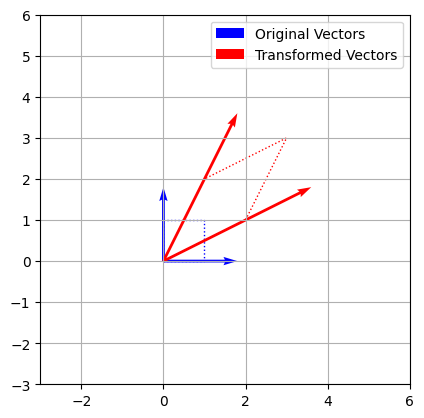

In [ ]:
# Plotting
fig, ax = plt.subplots()
# Original space and vectors
ax.quiver([0, 0], [0, 0], original_vectors[:, 0], original_vectors[:, 1], color='blue', scale=5, label='Original Vectors')
ax.add_patch(Polygon([[0, 0], original_vectors[0], original_vectors[0] + original_vectors[1], original_vectors[1]], fill=None, edgecolor='blue', linestyle='dotted'))
# Transformed space and vectors
ax.quiver([0, 0], [0, 0], transformed_vectors[:, 0], transformed_vectors[:, 1], color='red', scale=5, label='Transformed Vectors')
ax.add_patch(Polygon([[0, 0], transformed_vectors[0], transformed_vectors[0] + transformed_vectors[1], transformed_vectors[1]], fill=None, edgecolor='red', linestyle='dotted'))

ax.set_xlim(-3, 6)
ax.set_ylim(-3, 6)
ax.set_aspect('equal')
plt.legend()
plt.grid(True)
plt.show()

# Visual Example of Function / Mapping


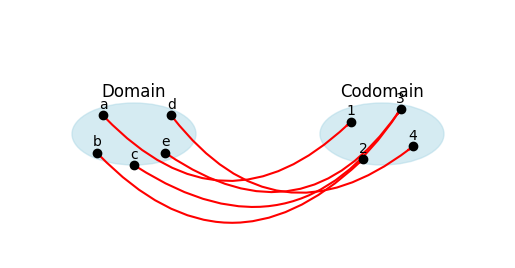

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_set(ax, center, width, height, label, points, point_labels):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, color='lightblue', fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=12)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=10)

# Initialize plot
fig, ax = plt.subplots()

# Define properties for domain and codomain
domain_center = [1, 0]
codomain_center = [5, 0]
set_width, set_height = 2, 1

# Points in the domain and codomain
domain_points = np.array([[-0.5, 0.3], [-0.6, -0.3], [0, -0.5], [0.6, 0.3], [0.5, -0.3]])
codomain_points = np.array([[-0.5, 0.2], [-0.3, -0.4], [0.3, 0.4], [0.5, -0.2]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'])
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'])

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=.5", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
ax.set_xlim(-1, 7)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.show()


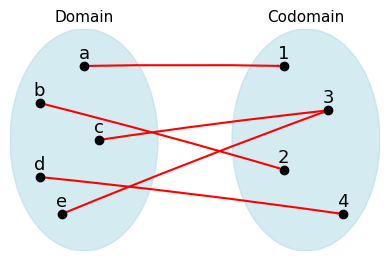

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_set(ax, center, width, height, label, points, point_labels):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, color='lightblue', fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=11)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=13)

# Initialize plot
fig, ax = plt.subplots(figsize=(4, 3))

# Define properties for domain and codomain
domain_center = [1.5, 0]
codomain_center = [4.5, 0]
set_width, set_height = 2, 3

# Points in the domain and codomain
domain_points = np.array([[0, 1], [-0.6, 0.5], [0.2, 0], [-0.6, -0.5], [-0.3, -1]])
codomain_points = np.array([[-0.3, 1], [-0.3, -0.4], [0.3, 0.4], [0.5, -1]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'])
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'])

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=-.01", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
# ax.set_xlim(-1, 7)
# ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.tight_layout(h_pad=0.0, w_pad=0.0)
plt.margins(0)
plt.show()

fig.savefig('FunctionOrMapping.png')

# visual example of a linear transformation
1. Domain space with vectors in it
2. Codomain space with transformed vectors in it
  - The matrix that I want to use for the transformation, I would like to use a basic example that will give whole numbers. (e.i. the vectors from domain to codomain will both have whole numbers as coefficients)
3. column space

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors in the domain space
vectors = np.array([[2, 3], [1, -2]])
origin = np.zeros((2, 2))  # Origin points for the vectors

# Define a transformation matrix
transformation_matrix = np.array([
    [-1, 0],
    [0, 1]
])

# Apply the transformation matrix to the vectors
transformed_vectors = vectors @ transformation_matrix.T

In [2]:
print(transformed_vectors)

[[-2  3]
 [-1 -2]]


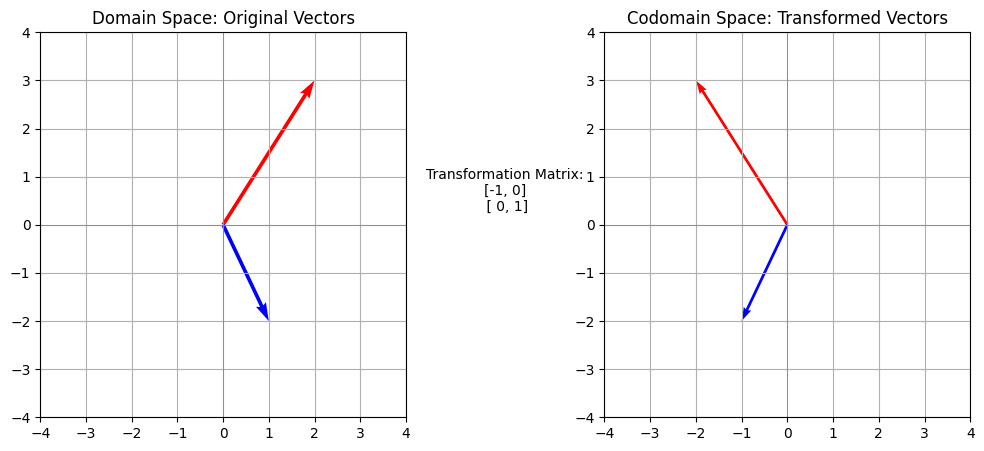

In [8]:
fig = plt.figure(figsize=(12, 5))

# Plot original vectors
ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', width=.010)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vectors')

# Plot transformed vectors
ax2 = fig.add_subplot(1,15,(10, 15))
ax2.quiver(*origin.T, *transformed_vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy')
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.axhline(0, color='grey', linewidth=0.5)
ax2.axvline(0, color='grey', linewidth=0.5)
ax2.grid(True)
ax2.set_title('Codomain Space: Transformed Vectors')

# Adding matrix annotation
matrix_str = f'Transformation Matrix:\n[-1, 0]\n [ 0, 1]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

# fig.tight_layout(pad=3.0)
fig.savefig('BasicLinearTransformation.png')

# Column Space Visual

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors in the domain space
vectors = np.array([[2, 3], [1, -2]])
origin = np.zeros((2, 2))  # Origin points for the vectors

transformation_matrix = np.array([
    [0, 0],
    [0, 1]
])

# Apply the transformation matrix to the vectors
transformed_vectors = vectors @ transformation_matrix.T

In [ ]:
print(transformation_matrix)

[[0 0]
 [0 1]]


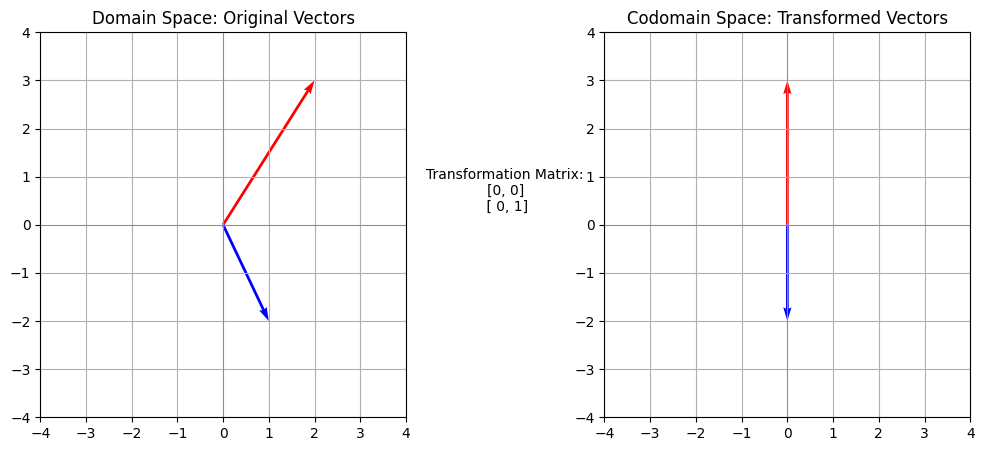

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Plot original vectors
ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy')
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vectors')

# Plot transformed vectors
ax2 = fig.add_subplot(1,15,(10, 15))
ax2.quiver(*origin.T, *transformed_vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy')
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.axhline(0, color='grey', linewidth=0.5)
ax2.axvline(0, color='grey', linewidth=0.5)
ax2.grid(True)
ax2.set_title('Codomain Space: Transformed Vectors')

# Adding matrix annotation
matrix_str = f'Transformation Matrix:\n[0, 0]\n [ 0, 1]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

# fig.tight_layout(pad=3.0)
fig.savefig('ColumnSpace.png')

# 2D to 3D Linear Transformation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([2, 3])
origin = np.zeros((1, 2))

# Define the transformation matrix
A = np.array([[1, 0],
              [0, 1],
              [1, 0]])

transformed_vectors = A @ vectors

In [11]:
transformed_vectors

array([2, 3, 2])

In [12]:
basis = np.array([[2, 0, 0], [0, 3, 0], [0, 0, 2]])

In [13]:
descriptive_transformed_vectors = np.concatenate(([transformed_vectors], basis), axis=0)
descriptive_transformed_vectors

array([[2, 3, 2],
       [2, 0, 0],
       [0, 3, 0],
       [0, 0, 2]])

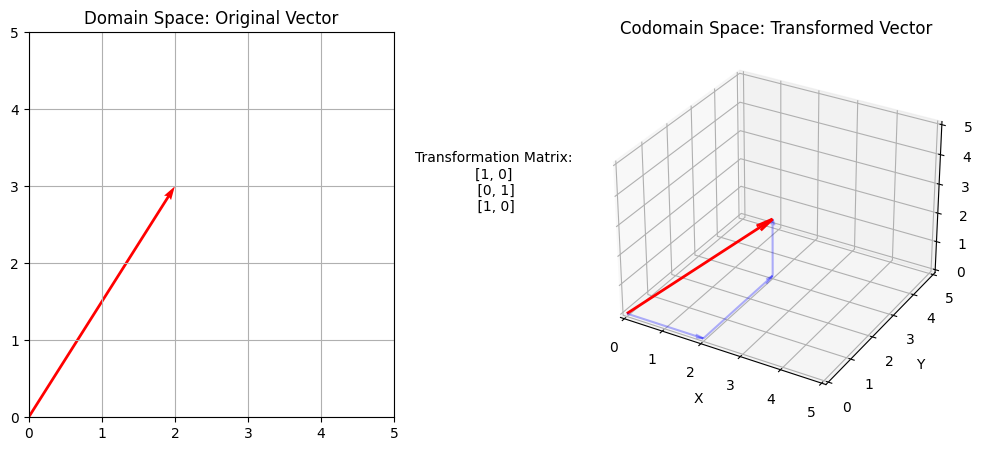

In [41]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r'], scale=1, linewidth=2.0, scale_units='xy', angles='xy')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vector')

ax2 = fig.add_subplot(1,15,(10, 15), projection='3d')
ax2.quiver(0,0,0, *descriptive_transformed_vectors[0], color=['r'], length=1, linewidth=2.0, arrow_length_ratio=0.1)
ax2.quiver(0,0,0, *descriptive_transformed_vectors[1], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(2,0,0, *descriptive_transformed_vectors[2], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(2,3,0, *descriptive_transformed_vectors[3], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([0, 5])
ax2.set_ylim([0, 5])
ax2.set_zlim([0, 5])
ax2.set_title('Codomain Space: Transformed Vector')

matrix_str = f'Transformation Matrix:\n[1, 0]\n [0, 1]\n [1, 0]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

fig.savefig('2d_to_3d_linear_transformation.png')